# Flow Detection

This notebook is used to design and play with the flow detection algorithm.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../swiss_flows')

## Data Cleaning

Clean the data: 

In [3]:
from clean_tweets import clean_tweets

clean_tweets('../data/clean_tweets')

Import the clean tweets: 

In [4]:
tweets = pd.read_csv('../data/clean_tweets.csv')
tweets.head()

,id,userId,createdAt,placeLongitude,placeLatitude,userLocation
0,776522983837954049,735449229028675584,2016-09-15 20:48:01,8.96044,46.0027,Earleen.
1,776523000636203010,2741685639,2016-09-15 20:48:05,8.22414,46.8131,Suisse
2,776523045200691200,435239151,2016-09-15 20:48:15,5.94082,47.2010,Fontain
3,776523058404290560,503244217,2016-09-15 20:48:18,6.16552,45.8011,Shargeyah
4,776523058504925185,452805259,2016-09-15 20:48:18,6.14319,46.2048,İstanbul/Burgazada


## Grouping by user

In order to detect flows, we need to analyse the differents locations of people. This requires to analyse tweets by user.

In [21]:
# Group by user
grouped = tweets.groupby('userId')

nb_user = len(tweets['userId'].value_counts())
print('Number of different users : {}.'.format(nb_user))

Number of different users : 2763.


How many tweets by user do we get ?

In [16]:
df = grouped.agg('count')['id'].reset_index().rename(columns={'id': 'tweets'}, index=str)
df.head()

,userId,tweets
0,2397,2
1,12582,9
2,22573,3
3,24883,1
4,55223,1


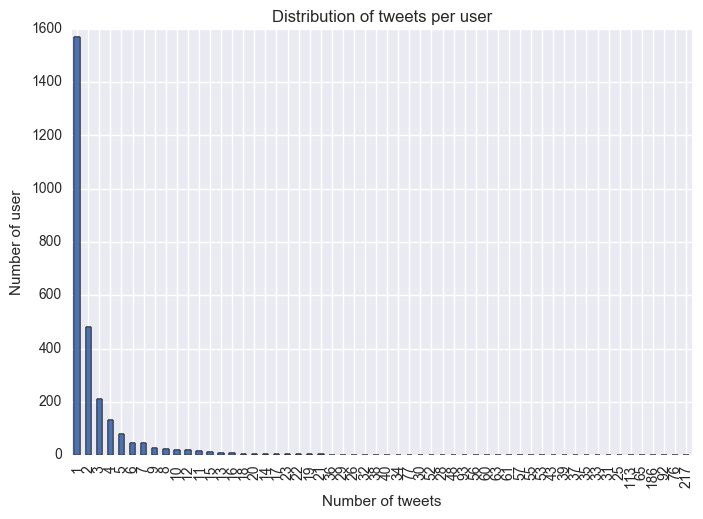

In [31]:
df['tweets'].value_counts().plot(kind='bar')
plt.title('Distribution of tweets per user')
plt.xlabel('Number of tweets')
plt.ylabel('Number of user')
plt.show()

Well, it seems most of the users tweeted only once. This isn't very good for our ultimate goal. But we have to keep in mind that the actual dataset contains much more tweets, and so much more user that tweet more than once.

## Filter users

Users who only post a unique tweet provide no insight in the flows we wish to detect. Their corresponding tweets should be removed.

## Maximum time interval

Tweets which are excessively spaced out in time are not viable. Thus, a tweet emitted at time $t$ by a given user should be removed if this user hasn't emitted another tweet within the interval $[t - l/2, t + l/2]$, where $l$ is a set duration.

Therefore, for each user, we create all pairs of tweets which respect the above criterion, since they may represent a potential flow. Tweets which can not pair with another tweet are considered "isolated", and thus removed.

## Actual flows

The pairs generated in the previous step represent potential flows only if the tweets were emitted at different Nodes. Consequently, we remove pairs where:
- one or both tweet(s) do(es) not reside in a Node
- both tweets were emitted at the same Node